In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


### Loading and Cleaning DataFrame

In [2]:
df=pd.read_csv('exp_results/GROUP4-FINAL exp1-table.csv',skiprows=6).rename(columns={})
df=df.copy().rename(columns={ 'japanese-resupply-rate':'j-resupp',
                             'japanese_supplies':'j-supp', 
                             'britain-casualties-hunger':'b-hung',
                             'britain-casualties-combat':'b-comb',
                             'japan-casualties-hunger':'j-hung',
                             'japan-casualties-combat':'j-comb', 
                             'count turtles with [team = "Japan" and status = "Retreat"]':'j-r',
                             'control-imphal':'imp',
                             'control-kohima':'koh'})
df1=df[['ticks','j-supp','b-hung','b-comb','j-hung','j-comb', 'imp', 'koh','j-r']].copy()

In [3]:
df1.loc[df1['imp']=='Britain','imp']=0.0
df1.loc[df1['imp']=='Japan','imp']=1.0
df1.loc[df1['koh']=='Britain','koh']=0.0
df1.loc[df1['koh']=='Japan','koh']=1.0
df1['koh']=df1['koh'].astype(int)
df1['imp']=df1['imp'].astype(int)
df1['j-tot']=df1['j-comb']+df1['j-hung']+df1['j-r']
df1['b-tot']=df1['b-comb']+df1['b-hung']
df1['j-per']=df1['j-comb']/df1['j-tot']
df1['b-per']=df1['b-comb']/df1['b-tot']

In [4]:
zero=df1[df1['j-supp']==0].groupby('ticks').mean()
one=df1[df1['j-supp']==25].groupby('ticks').mean()
two=df1[df1['j-supp']==50].groupby('ticks').mean()
three=df1[df1['j-supp']==75].groupby('ticks').mean()
four=df1[df1['j-supp']==100].groupby('ticks').mean()


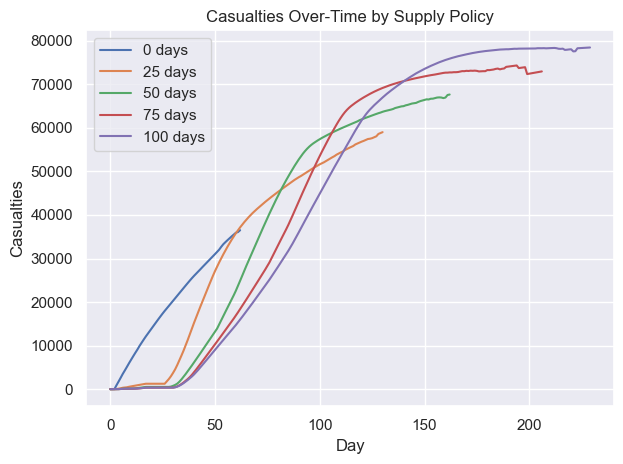

In [5]:
sns.set_theme()

plt.figure()
plt.plot(zero['j-tot'])
plt.plot(one['j-tot'])
plt.plot(two['j-tot'])
plt.plot(three['j-tot']
        )
plt.plot(four['j-tot'])
plt.ticklabel_format(style='plain')
plt.title('Casualties Over-Time by Supply Policy')
plt.xlabel('Day')
plt.ylabel('Casualties')
plt.legend(['0 days','25 days','50 days','75 days', '100 days'])

plt.tight_layout()
plt.savefig('images/exp1.png',dpi=500)


